In [24]:
#read Data 
import pandas as pd
import numpy as np
data1=df=pd.read_csv("C:\\Users\\abhishek\\Desktop\\iiitdabhi\\3rdsem\\MLBA\\project\\New Lung Cancer.csv", header = 0)
data1

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Patient ID,Age recode with <1 year olds,Grade,RX Summ--Surg Prim Site (1998+),RX Summ--Scope Reg LN Sur (2003+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Primary Site,Sequence number,First malignant primary indicator,Survival months,CS lymph nodes (2004-2015),CS tumor size (2004-2015),Histology recode - broad groupings,Sex,SEER Combined Mets at DX-lung (2010+),Total number of in situ/malignant tumors for patient
0,273,75-79 years,Well differentiated; Grade I,30,4 or more regional lymph nodes removed,Blank(s),Blank(s),Blank(s),343,2nd of 2 or more primaries,No,128,0,31,8140-8389: adenomas and adenocarcinomas,Female,Blank(s),2
1,455,75-79 years,Poorly differentiated; Grade III,30,4 or more regional lymph nodes removed,Blank(s),Blank(s),Blank(s),343,2nd of 2 or more primaries,No,5,0,55,8050-8089: squamous cell neoplasms,Male,Blank(s),2
2,565,70-74 years,Unknown,0,None,Blank(s),Blank(s),Blank(s),341,2nd of 2 or more primaries,No,0,0,44,"8010-8049: epithelial neoplasms, NOS",Female,Blank(s),2
3,707,75-79 years,Unknown,0,None,Blank(s),Blank(s),Blank(s),341,2nd of 2 or more primaries,No,95,0,14,8140-8389: adenomas and adenocarcinomas,Female,Blank(s),2
4,897,50-54 years,Undifferentiated; anaplastic; Grade IV,0,None,Blank(s),Blank(s),Blank(s),340,2nd of 2 or more primaries,No,23,200,16,"8010-8049: epithelial neoplasms, NOS",Female,Blank(s),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307659,75801097,40-44 years,Unknown,21,None,Blank(s),Blank(s),Blank(s),341,2nd of 2 or more primaries,No,145,0,2,8550-8559: acinar cell neoplasms,Female,Blank(s),2
307660,75804048,70-74 years,Unknown,0,None,Blank(s),Blank(s),Blank(s),349,2nd of 2 or more primaries,No,105,999,999,8000-8009: unspecified neoplasms,Female,Blank(s),2
307661,75807515,55-59 years,Unknown,0,None,Blank(s),Blank(s),Blank(s),349,1st of 2 or more primaries,Yes,135,999,999,"8010-8049: epithelial neoplasms, NOS",Male,Blank(s),2
307662,75822099,70-74 years,Unknown,0,None,Blank(s),Blank(s),Blank(s),349,One primary only,Yes,102,999,999,"8010-8049: epithelial neoplasms, NOS",Female,Blank(s),1


In [2]:
# print(list(data1.columns))
# print(data1[list(data1.columns)[7]].value_counts())

In [25]:
data_types = list(data1.dtypes)
attribute2 = list(data1.columns)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(0, len(data_types)):
    if(data_types[i] == 'object' and attribute2[i]!="Survival months"):
        print(attribute2[i])
        temp_list = list(data1[attribute2[i]])
        le.fit(temp_list)
        data1 = data1.drop([attribute2[i]], axis = 1)
        data1[attribute2[i]] = list(le.transform(temp_list))

Age recode with <1 year olds
Grade
RX Summ--Scope Reg LN Sur (2003+)
T value - based on AJCC 3rd (1988-2003)
N value - based on AJCC 3rd (1988-2003)
M value - based on AJCC 3rd (1988-2003)
Sequence number
First malignant primary indicator
Histology recode - broad groupings
Sex
SEER Combined Mets at DX-lung (2010+)
Total number of in situ/malignant tumors for patient


In [26]:
survival_months = list(data1["Survival months"])
data1 = data1.drop(['Survival months'], axis = 1)
for i in range(0, len(survival_months)):
    if(survival_months[i]=="Unknown"):
        survival_months[i] = 0
    else:
        survival_months[i] = int(survival_months[i])

In [27]:
data1.iloc[0]

Patient ID                                              273
RX Summ--Surg Prim Site (1998+)                          30
Primary Site                                            343
CS lymph nodes (2004-2015)                                0
CS tumor size (2004-2015)                                31
Age recode with <1 year olds                             16
Grade                                                     4
RX Summ--Scope Reg LN Sur (2003+)                         1
T value - based on AJCC 3rd (1988-2003)                   0
N value - based on AJCC 3rd (1988-2003)                   0
M value - based on AJCC 3rd (1988-2003)                   0
Sequence number                                           3
First malignant primary indicator                         0
Histology recode - broad groupings                        5
Sex                                                       0
SEER Combined Mets at DX-lung (2010+)                     0
Total number of in situ/malignant tumors

In [28]:
len(set(data1['Patient ID']))
data1=data1.drop(columns=['Patient ID'])
data1

,RX Summ--Surg Prim Site (1998+),Primary Site,CS lymph nodes (2004-2015),CS tumor size (2004-2015),Age recode with <1 year olds,Grade,RX Summ--Scope Reg LN Sur (2003+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Sequence number,First malignant primary indicator,Histology recode - broad groupings,Sex,SEER Combined Mets at DX-lung (2010+),Total number of in situ/malignant tumors for patient
0,30,343,0,31,16,4,1,0,0,0,3,0,5,0,0,4
1,30,343,0,55,16,1,1,0,0,0,3,0,2,1,0,4
2,0,341,0,44,15,3,3,0,0,0,3,0,1,0,0,4
3,0,341,0,14,16,3,3,0,0,0,3,0,5,0,0,4
4,0,340,200,16,11,2,3,0,0,0,3,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307659,21,341,0,2,9,3,3,0,0,0,3,0,9,0,0,4
307660,0,349,999,999,15,3,3,0,0,0,3,0,0,0,0,4
307661,0,349,999,999,12,3,3,0,0,0,2,1,1,1,0,4
307662,0,349,999,999,15,3,3,0,0,0,11,1,1,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data1))
X.columns=data1.columns
X.head()

,RX Summ--Surg Prim Site (1998+),Primary Site,CS lymph nodes (2004-2015),CS tumor size (2004-2015),Age recode with <1 year olds,Grade,RX Summ--Scope Reg LN Sur (2003+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Sequence number,First malignant primary indicator,Histology recode - broad groupings,Sex,SEER Combined Mets at DX-lung (2010+),Total number of in situ/malignant tumors for patient
0,0.953816,-0.011736,-0.814635,-0.686831,0.672107,1.543681,-1.246284,0.0,0.0,0.0,-1.589763,-1.903796,1.037731,-1.068386,0.0,1.427582
1,0.953816,-0.011736,-0.814635,-0.632425,0.672107,-0.934439,-1.246284,0.0,0.0,0.0,-1.589763,-1.903796,-0.318951,0.935991,0.0,1.427582
2,-0.470495,-0.665312,-0.814635,-0.657361,0.229133,0.717641,0.162837,0.0,0.0,0.0,-1.589763,-1.903796,-0.771178,-1.068386,0.0,1.427582
3,-0.470495,-0.665312,-0.814635,-0.725369,0.672107,0.717641,0.162837,0.0,0.0,0.0,-1.589763,-1.903796,1.037731,-1.068386,0.0,1.427582
4,-0.470495,-0.992100,-0.233083,-0.720836,-1.542759,-0.108399,0.162837,0.0,0.0,0.0,-1.589763,-1.903796,-0.771178,-1.068386,0.0,1.427582


In [30]:
# print(len(data1),len(survival_months))
data1=X
data1['Survival months']=survival_months
data1

,RX Summ--Surg Prim Site (1998+),Primary Site,CS lymph nodes (2004-2015),CS tumor size (2004-2015),Age recode with <1 year olds,Grade,RX Summ--Scope Reg LN Sur (2003+),T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Sequence number,First malignant primary indicator,Histology recode - broad groupings,Sex,SEER Combined Mets at DX-lung (2010+),Total number of in situ/malignant tumors for patient,Survival months
0,0.953816,-0.011736,-0.814635,-0.686831,0.672107,1.543681,-1.246284,0.0,0.0,0.0,-1.589763,-1.903796,1.037731,-1.068386,0.0,1.427582,128
1,0.953816,-0.011736,-0.814635,-0.632425,0.672107,-0.934439,-1.246284,0.0,0.0,0.0,-1.589763,-1.903796,-0.318951,0.935991,0.0,1.427582,5
2,-0.470495,-0.665312,-0.814635,-0.657361,0.229133,0.717641,0.162837,0.0,0.0,0.0,-1.589763,-1.903796,-0.771178,-1.068386,0.0,1.427582,0
3,-0.470495,-0.665312,-0.814635,-0.725369,0.672107,0.717641,0.162837,0.0,0.0,0.0,-1.589763,-1.903796,1.037731,-1.068386,0.0,1.427582,95
4,-0.470495,-0.992100,-0.233083,-0.720836,-1.542759,-0.108399,0.162837,0.0,0.0,0.0,-1.589763,-1.903796,-0.771178,-1.068386,0.0,1.427582,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307659,0.526523,-0.665312,-0.814635,-0.752573,-2.428706,0.717641,0.162837,0.0,0.0,0.0,-1.589763,-1.903796,2.846640,-1.068386,0.0,1.427582,145
307660,-0.470495,1.948993,2.090218,1.507575,0.229133,0.717641,0.162837,0.0,0.0,0.0,-1.589763,-1.903796,-1.223405,-1.068386,0.0,1.427582,105
307661,-0.470495,1.948993,2.090218,1.507575,-1.099786,0.717641,0.162837,0.0,0.0,0.0,-1.866220,0.525266,-0.771178,0.935991,0.0,1.427582,135
307662,-0.470495,1.948993,2.090218,1.507575,0.229133,0.717641,0.162837,0.0,0.0,0.0,0.621891,0.525266,-0.771178,-1.068386,0.0,-0.611438,102


### Remove Duplicates rows

In [31]:
#Remove Duplicates  rows
# print(len(df))
# data1
print("No of rows before removing duplicate rows",len(data1))
data1.drop_duplicates( subset=None, keep='first', inplace=True)
print("No of rows after removing duplicate rows",len(data1))

No of rows before removing duplicate rows 307664
No of rows after removing duplicate rows 262083


### Find if any row have all null values

In [32]:
row_count, column_count = data1.shape
list_of_columns=list(data1.columns)
print(row_count, column_count,list_of_columns[len(list_of_columns)-1])


262083 17 Survival months


In [33]:
kf = data1.dropna(how = 'all')
print(data1.shape," ",kf.shape)

(262083, 17)   (262083, 17)


### Find Percentage of null value in each column

In [34]:
#analysis2
#find percentage of null values 
df_missing=data1.isna()
df_count_missing=df_missing.sum()
per_none_value=df_count_missing/len(df_count_missing)
per_none_value.sort_values(ascending=False,inplace=True)
print("% of null values in each column")
print(per_none_value)

% of null values in each column
Survival months                                         0.0
T value - based on AJCC 3rd (1988-2003)                 0.0
Primary Site                                            0.0
CS lymph nodes (2004-2015)                              0.0
CS tumor size (2004-2015)                               0.0
Age recode with <1 year olds                            0.0
Grade                                                   0.0
RX Summ--Scope Reg LN Sur (2003+)                       0.0
N value - based on AJCC 3rd (1988-2003)                 0.0
Total number of in situ/malignant tumors for patient    0.0
M value - based on AJCC 3rd (1988-2003)                 0.0
Sequence number                                         0.0
First malignant primary indicator                       0.0
Histology recode - broad groupings                      0.0
Sex                                                     0.0
SEER Combined Mets at DX-lung (2010+)                   0.0
RX Summ-

In [13]:
list(data1.columns)

['RX Summ--Surg Prim Site (1998+)',
 'Primary Site',
 'CS lymph nodes (2004-2015)',
 'CS tumor size (2004-2015)',
 'Age recode with <1 year olds',
 'Grade',
 'RX Summ--Scope Reg LN Sur (2003+)',
 'T value - based on AJCC 3rd (1988-2003)',
 'N value - based on AJCC 3rd (1988-2003)',
 'M value - based on AJCC 3rd (1988-2003)',
 'Sequence number',
 'First malignant primary indicator',
 'Histology recode - broad groupings',
 'Sex',
 'SEER Combined Mets at DX-lung (2010+)',
 'Total number of in situ/malignant tumors for patient',
 'Survival months']

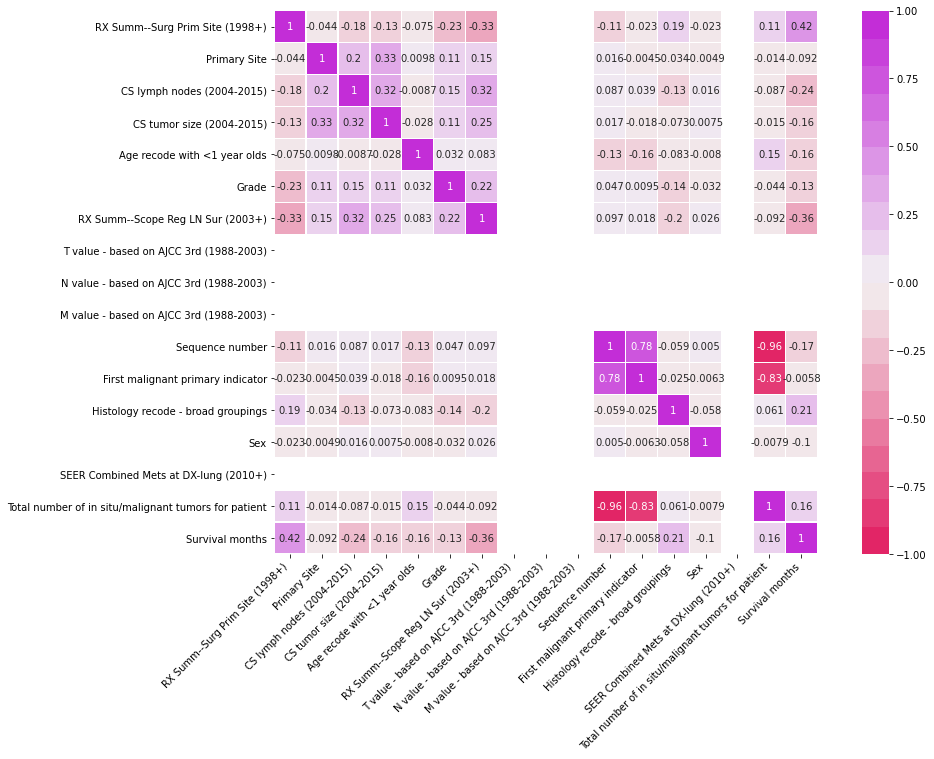

In [35]:
# classification_data
import seaborn as sns
import matplotlib.pyplot as plt
corr = data1.corr()
plt.figure(figsize = (16,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 300,s=90, n=20),
    square=True,linewidths=.5,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [36]:
for x in data1.columns:
    if((data1[x] == 0).all()):
        print(x)

T value - based on AJCC 3rd (1988-2003)
N value - based on AJCC 3rd (1988-2003)
M value - based on AJCC 3rd (1988-2003)
SEER Combined Mets at DX-lung (2010+)


In [37]:
for x in data1.columns:
    if((data1[x] == 0).all()):
        data1=data1.drop(columns=[x])
data1
# data1=data1.drop(columns=[data1.columns[x]])

,RX Summ--Surg Prim Site (1998+),Primary Site,CS lymph nodes (2004-2015),CS tumor size (2004-2015),Age recode with <1 year olds,Grade,RX Summ--Scope Reg LN Sur (2003+),Sequence number,First malignant primary indicator,Histology recode - broad groupings,Sex,Total number of in situ/malignant tumors for patient,Survival months
0,0.953816,-0.011736,-0.814635,-0.686831,0.672107,1.543681,-1.246284,-1.589763,-1.903796,1.037731,-1.068386,1.427582,128
1,0.953816,-0.011736,-0.814635,-0.632425,0.672107,-0.934439,-1.246284,-1.589763,-1.903796,-0.318951,0.935991,1.427582,5
2,-0.470495,-0.665312,-0.814635,-0.657361,0.229133,0.717641,0.162837,-1.589763,-1.903796,-0.771178,-1.068386,1.427582,0
3,-0.470495,-0.665312,-0.814635,-0.725369,0.672107,0.717641,0.162837,-1.589763,-1.903796,1.037731,-1.068386,1.427582,95
4,-0.470495,-0.992100,-0.233083,-0.720836,-1.542759,-0.108399,0.162837,-1.589763,-1.903796,-0.771178,-1.068386,1.427582,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307659,0.526523,-0.665312,-0.814635,-0.752573,-2.428706,0.717641,0.162837,-1.589763,-1.903796,2.846640,-1.068386,1.427582,145
307660,-0.470495,1.948993,2.090218,1.507575,0.229133,0.717641,0.162837,-1.589763,-1.903796,-1.223405,-1.068386,1.427582,105
307661,-0.470495,1.948993,2.090218,1.507575,-1.099786,0.717641,0.162837,-1.866220,0.525266,-0.771178,0.935991,1.427582,135
307662,-0.470495,1.948993,2.090218,1.507575,0.229133,0.717641,0.162837,0.621891,0.525266,-0.771178,-1.068386,-0.611438,102


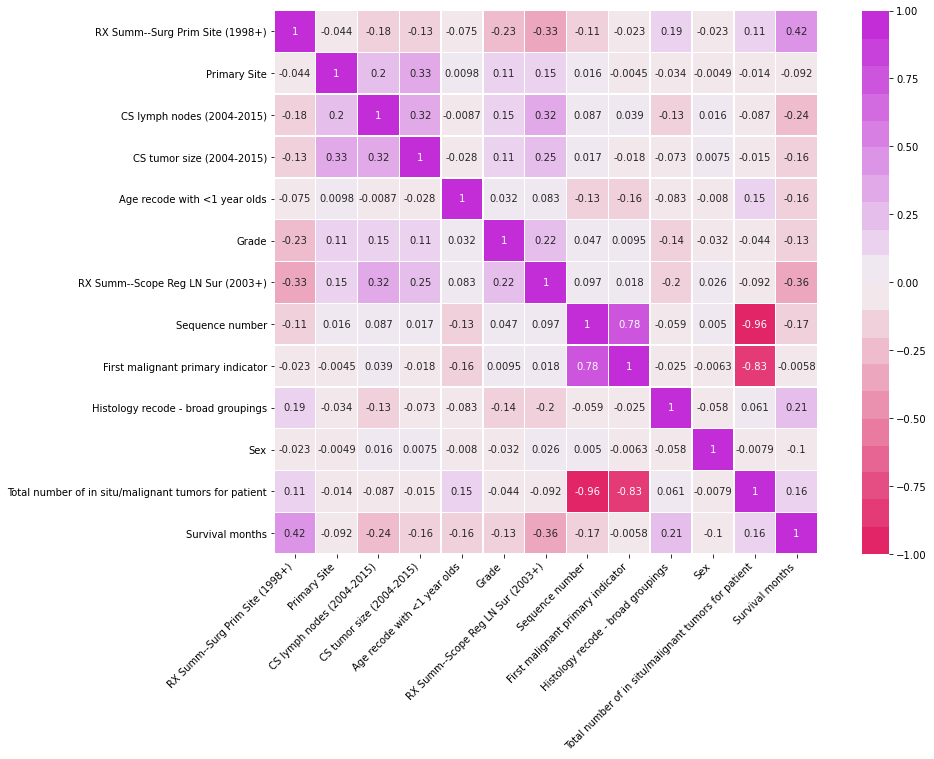

In [38]:
# classification_data
import seaborn as sns
import matplotlib.pyplot as plt
corr = data1.corr()
plt.figure(figsize = (16,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 300,s=90, n=20),
    square=True,linewidths=.5,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [39]:
data1

,RX Summ--Surg Prim Site (1998+),Primary Site,CS lymph nodes (2004-2015),CS tumor size (2004-2015),Age recode with <1 year olds,Grade,RX Summ--Scope Reg LN Sur (2003+),Sequence number,First malignant primary indicator,Histology recode - broad groupings,Sex,Total number of in situ/malignant tumors for patient,Survival months
0,0.953816,-0.011736,-0.814635,-0.686831,0.672107,1.543681,-1.246284,-1.589763,-1.903796,1.037731,-1.068386,1.427582,128
1,0.953816,-0.011736,-0.814635,-0.632425,0.672107,-0.934439,-1.246284,-1.589763,-1.903796,-0.318951,0.935991,1.427582,5
2,-0.470495,-0.665312,-0.814635,-0.657361,0.229133,0.717641,0.162837,-1.589763,-1.903796,-0.771178,-1.068386,1.427582,0
3,-0.470495,-0.665312,-0.814635,-0.725369,0.672107,0.717641,0.162837,-1.589763,-1.903796,1.037731,-1.068386,1.427582,95
4,-0.470495,-0.992100,-0.233083,-0.720836,-1.542759,-0.108399,0.162837,-1.589763,-1.903796,-0.771178,-1.068386,1.427582,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307659,0.526523,-0.665312,-0.814635,-0.752573,-2.428706,0.717641,0.162837,-1.589763,-1.903796,2.846640,-1.068386,1.427582,145
307660,-0.470495,1.948993,2.090218,1.507575,0.229133,0.717641,0.162837,-1.589763,-1.903796,-1.223405,-1.068386,1.427582,105
307661,-0.470495,1.948993,2.090218,1.507575,-1.099786,0.717641,0.162837,-1.866220,0.525266,-0.771178,0.935991,1.427582,135
307662,-0.470495,1.948993,2.090218,1.507575,0.229133,0.717641,0.162837,0.621891,0.525266,-0.771178,-1.068386,-0.611438,102


In [40]:
from sklearn.model_selection import train_test_split
X=data1.loc[:, data1.columns != 'Survival months']
y=data1['Survival months']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200)
regr.fit(X_train, y_train)
y_pred_rf = regr.predict(X_test)

In [42]:
from sklearn import metrics

In [43]:
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
# print('R squared: ',lr2.score(X_train,y_train))

MAE (Mean Absolute Error): 20.263365936154393
MSE (Mean Square Error ): 915.0482372280957
RMSE (Root Mean Square Error ): 30.24976425078542


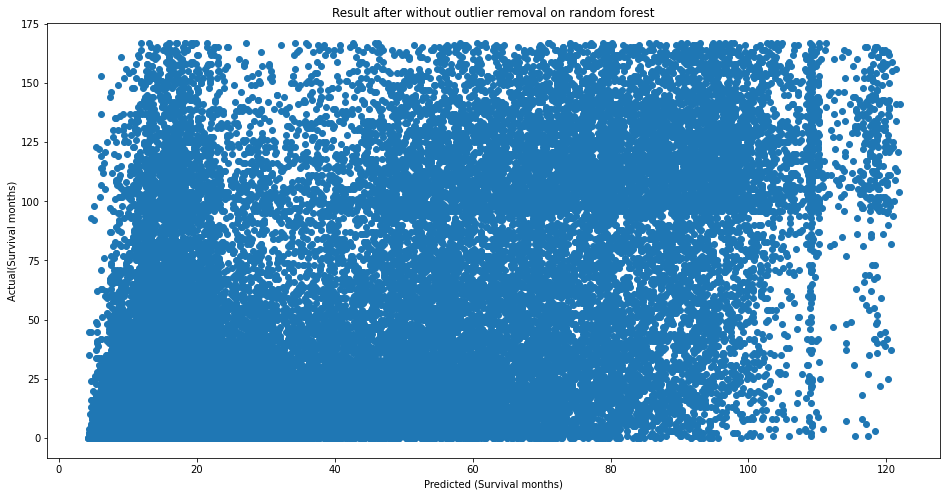

In [84]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_pred_rf,y_test)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after without outlier removal on random forest")
plt.show()

In [110]:
# from scipy.stats import norm 
# kp=sns.countplot(x='Survival months', data=data1)
# kp.set_xticklabels(rotation=30)

In [50]:

# # import seaborn as sns
# # planets = sns.load_dataset("planets")
# g = sns.factorplot('Survival months', data=data1, aspect=1.5, kind="count", color="b")
# g.set_xticklabels(rotation=90)

### Histogram plots

array([[<AxesSubplot:title={'center':'RX Summ--Surg Prim Site (1998+)'}>,
        <AxesSubplot:title={'center':'Primary Site'}>,
        <AxesSubplot:title={'center':'CS lymph nodes (2004-2015)'}>,
        <AxesSubplot:title={'center':'CS tumor size (2004-2015)'}>],
       [<AxesSubplot:title={'center':'Age recode with <1 year olds'}>,
        <AxesSubplot:title={'center':'Grade'}>,
        <AxesSubplot:title={'center':'RX Summ--Scope Reg LN Sur (2003+)'}>,
        <AxesSubplot:title={'center':'Sequence number'}>],
       [<AxesSubplot:title={'center':'First malignant primary indicator'}>,
        <AxesSubplot:title={'center':'Histology recode - broad groupings'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Total number of in situ/malignant tumors for patient'}>],
       [<AxesSubplot:title={'center':'Survival months'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

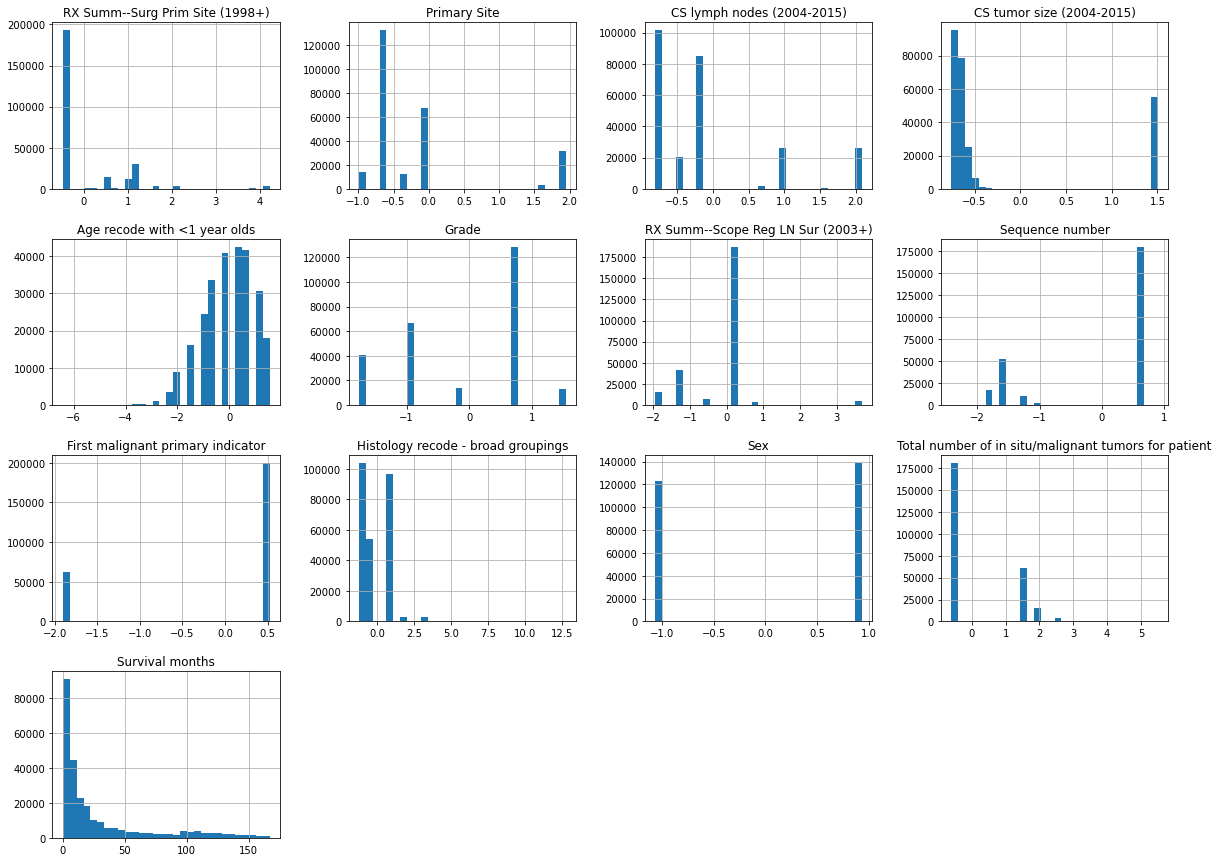

In [46]:
data1.hist(figsize=[20,15],bins=30)


<AxesSubplot:xlabel='RX Summ--Surg Prim Site (1998+)'>

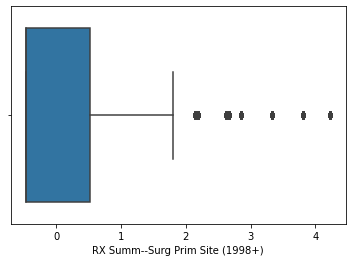

In [54]:
# for cl in data1.columns:
sns.boxplot(x=data1[list(data1.columns)[0]])

<AxesSubplot:xlabel='Primary Site'>

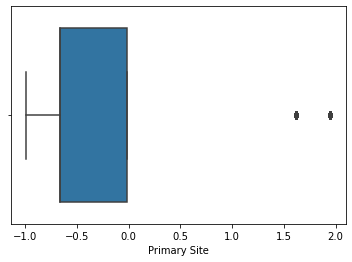

In [55]:
# for cl in data1.columns:
sns.boxplot(x=data1[list(data1.columns)[1]])

<AxesSubplot:xlabel='CS lymph nodes (2004-2015)'>

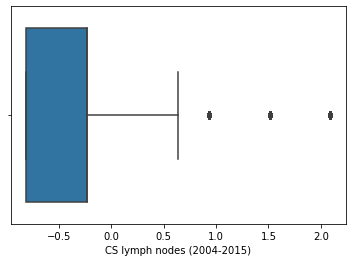

In [56]:
# for cl in data1.columns:
sns.boxplot(x=data1[list(data1.columns)[2]])

<AxesSubplot:xlabel='Age recode with <1 year olds'>

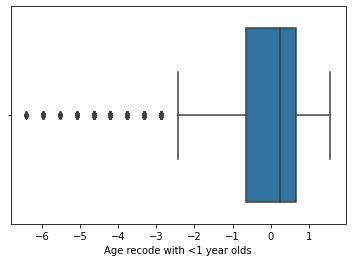

In [57]:
# for cl in data1.columns:
sns.boxplot(x=data1[list(data1.columns)[4]])

<AxesSubplot:xlabel='RX Summ--Scope Reg LN Sur (2003+)'>

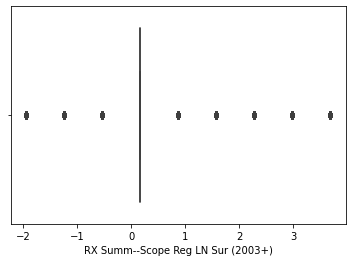

In [58]:
# for cl in data1.columns:
sns.boxplot(x=data1[list(data1.columns)[6]])

<AxesSubplot:xlabel='Sequence number'>

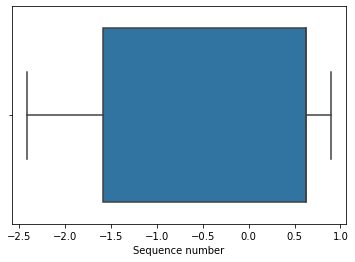

In [59]:
# for cl in data1.columns:
sns.boxplot(x=data1[list(data1.columns)[7]])

<AxesSubplot:xlabel='First malignant primary indicator'>

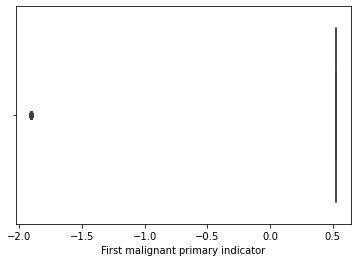

In [60]:
# for cl in data1.columns:
sns.boxplot(x=data1[list(data1.columns)[8]])

<AxesSubplot:xlabel='Histology recode - broad groupings'>

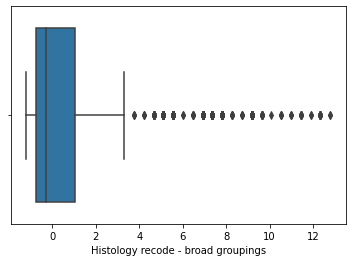

In [61]:
# for cl in data1.columns:
sns.boxplot(x=data1[list(data1.columns)[9]])

### IQR

In [64]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
df_out = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_out
# sns.countplot(x='quality', data=df_out)

In [68]:
from sklearn.model_selection import train_test_split
X1=df_out.loc[:, data1.columns != 'Survival months']
y1=df_out['Survival months']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200)
regr.fit(X_train1, y_train1)
y_pred_rf1 = regr.predict(X_test1)
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test1, y_pred_rf1))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(y_test1, y_pred_rf1))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_rf1)))
# print('R squared: ',lr2.score(X_train,y_train))

MAE (Mean Absolute Error): 10.402586908838918
MSE (Mean Square Error ): 220.50916674888416
RMSE (Root Mean Square Error ): 14.849551062199966


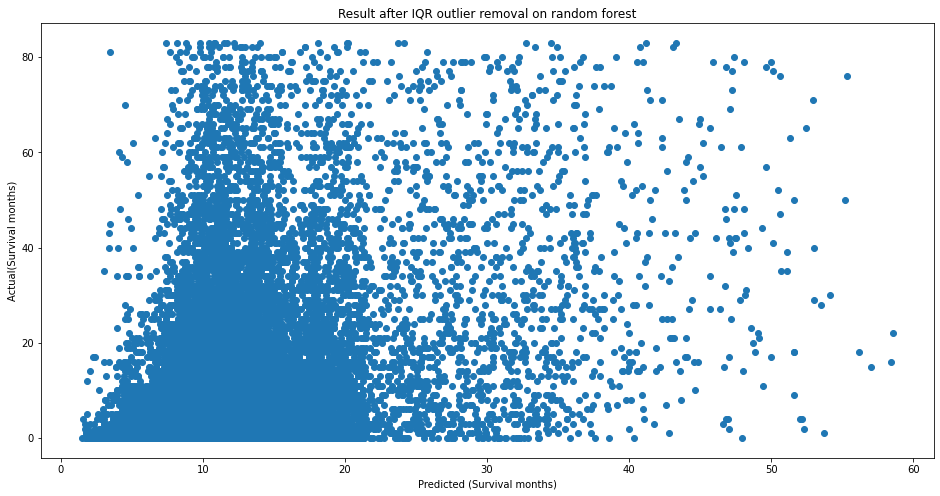

In [83]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_pred_rf1,y_test1)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after IQR outlier removal on random forest")
plt.show()

## zscore

In [66]:

from scipy import stats
kf=data1[(np.abs(stats.zscore(data1)) < 3).all(axis=1)]
# sns.countplot(x='quality', data=kf)

In [69]:
from sklearn.model_selection import train_test_split
X2=kf.loc[:, data1.columns != 'Survival months']
y2=kf['Survival months']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200)
regr.fit(X_train2, y_train2)
y_pred_rf2 = regr.predict(X_test2)
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test2, y_pred_rf2))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(y_test2, y_pred_rf2))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_rf2)))
# print('R squared: ',lr2.score(X_train,y_train))

MAE (Mean Absolute Error): 18.901011054376305
MSE (Mean Square Error ): 778.7862718801348
RMSE (Root Mean Square Error ): 27.90674240896158


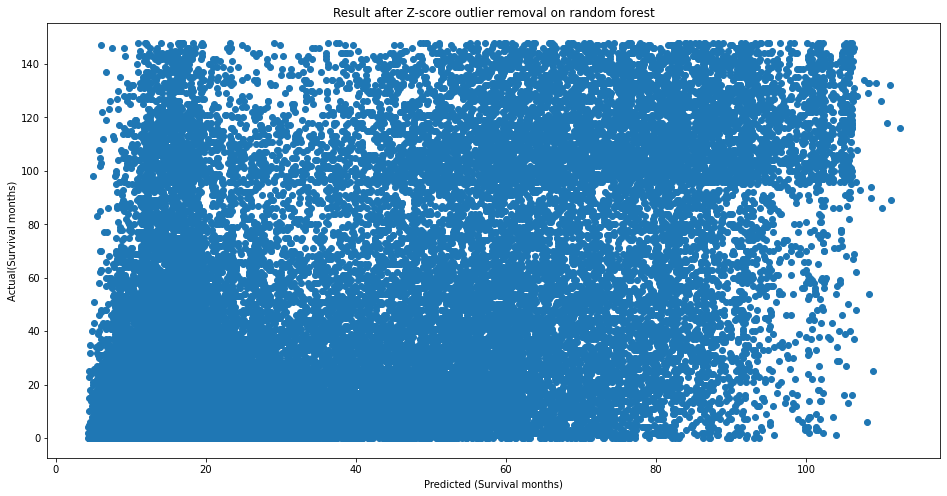

In [82]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_pred_rf2,y_test2)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after Z-score outlier removal on random forest")
plt.show()

In [70]:
print(len(kf),len(data1),len(df_out))

245429 262083 75017


# here we getting better results after removing outliers using IQR method so we implement further models using this data only

In [140]:
new_data=df_out

In [141]:
Xf=new_data.loc[:, data1.columns != 'Survival months']
yf=new_data['Survival months']


In [142]:
sd=[]
sdr=[]
RMSE_CV=[]
MAE=[]
MSE=[]
RMSE=[]


In [164]:
methods=["Linear Regression","Random Forest"," Gradient Boosting Regression","Ensemble","SVM","Decision Tree"]

## Linear Regression

In [143]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statistics
rmse_linear = []
last_iteration_actual=[]
last_iteration_predicted=[]
from math import sqrt
for i in range(0, 10):
#     print(i)
    X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.3)
#     X_train, X_test, y_train, y_test = train_test_split(data, survival_months, test_size=0.3, random_state=42)
    reg = LinearRegression().fit(X_trainf, y_trainf)
    y_predf = reg.predict(X_testf)
    if(i==9):
        last_iteration_actual=y_testf
        last_iteration_predicted=y_predf
    rmse_linear.append(sqrt(mean_squared_error(y_testf, y_predf)))

print("Standard Deviation of predicted values",statistics.stdev(last_iteration_predicted))
last_iteration_predicted_is = np.array(last_iteration_predicted)
last_iteration_actual_is = np.array(last_iteration_actual)
n = len(last_iteration_actual_is)
print("Standard Deviation Residuals",sqrt((sum((last_iteration_predicted_is - last_iteration_actual_is)**2))/(n-2)))

print("RMSE cross validation is ",statistics.mean(rmse_linear))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(last_iteration_actual, last_iteration_predicted))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(last_iteration_actual, last_iteration_predicted))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(last_iteration_actual, last_iteration_predicted)))
sd.append(statistics.stdev(last_iteration_predicted))
sdr.append(sqrt((sum((last_iteration_predicted_is - last_iteration_actual_is)**2))/(n-2)))
MAE.append(metrics.mean_absolute_error(last_iteration_actual, last_iteration_predicted))
MSE.append(metrics.mean_squared_error(last_iteration_actual, last_iteration_predicted))
RMSE_CV.append(statistics.mean(rmse_linear))
RMSE.append(np.sqrt(metrics.mean_squared_error(last_iteration_actual, last_iteration_predicted)))


Standard Deviation of predicted values 5.371178051885274
Standard Deviation Residuals 14.97876773612364
RMSE cross validation is  14.956484850312737
MAE (Mean Absolute Error): 10.634822253713258
MSE (Mean Square Error ): 224.34354478886337
RMSE (Root Mean Square Error ): 14.978102175805297


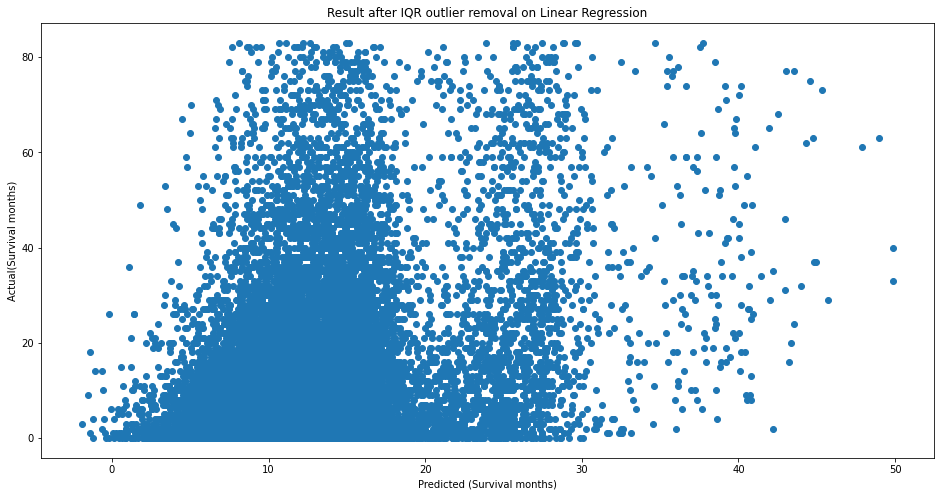

In [144]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(last_iteration_predicted,last_iteration_actual)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after IQR outlier removal on Linear Regression")
plt.show()

## Random Forest

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rmse_rf = []
rf_last_iteration_actual=[]
rf_last_iteration_predicted=[]
for i in range(0, 10):
#     print(i)
    X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.3)
    regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200)
    regr.fit(X_trainf, y_trainf)
    y_pred_rf = regr.predict(X_testf)
    rmse_rf.append(sqrt(mean_squared_error(y_testf, y_pred_rf)))
    if(i==9):
        rf_last_iteration_actual=y_testf
        rf_last_iteration_predicted=y_pred_rf
    rmse_rf.append(sqrt(mean_squared_error(y_testf, y_pred_rf)))
print("Standard Deviation of predicted values",statistics.stdev(rf_last_iteration_predicted))
rf_last_iteration_predicted_is = np.array(rf_last_iteration_predicted)
rf_last_iteration_actual_is = np.array(rf_last_iteration_actual)
n = len(rf_last_iteration_actual_is)
print("Standard Deviation Residuals",sqrt((sum((rf_last_iteration_predicted_is - rf_last_iteration_actual_is)**2))/(n-2)))

print("RMSE cross validation is ",statistics.mean(rmse_rf))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(rf_last_iteration_actual, rf_last_iteration_predicted))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(rf_last_iteration_actual, rf_last_iteration_predicted))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(rf_last_iteration_actual, rf_last_iteration_predicted)))
sd.append(statistics.stdev(rf_last_iteration_predicted))
sdr.append(sqrt((sum((rf_last_iteration_predicted_is - rf_last_iteration_actual_is)**2))/(n-2)))
MAE.append(metrics.mean_absolute_error(rf_last_iteration_actual, rf_last_iteration_predicted))
MSE.append(metrics.mean_squared_error(rf_last_iteration_actual, rf_last_iteration_predicted))
RMSE_CV.append(statistics.mean(rmse_rf))
RMSE.append(np.sqrt(metrics.mean_squared_error(rf_last_iteration_actual, rf_last_iteration_predicted)))

Standard Deviation of predicted values 6.086402980614285
Standard Deviation Residuals 14.649574480642304
RMSE cross validation is  14.759297022694119
MAE (Mean Absolute Error): 10.316861326048409
MSE (Mean Square Error ): 214.59096110225232
RMSE (Root Mean Square Error ): 14.64892354755981


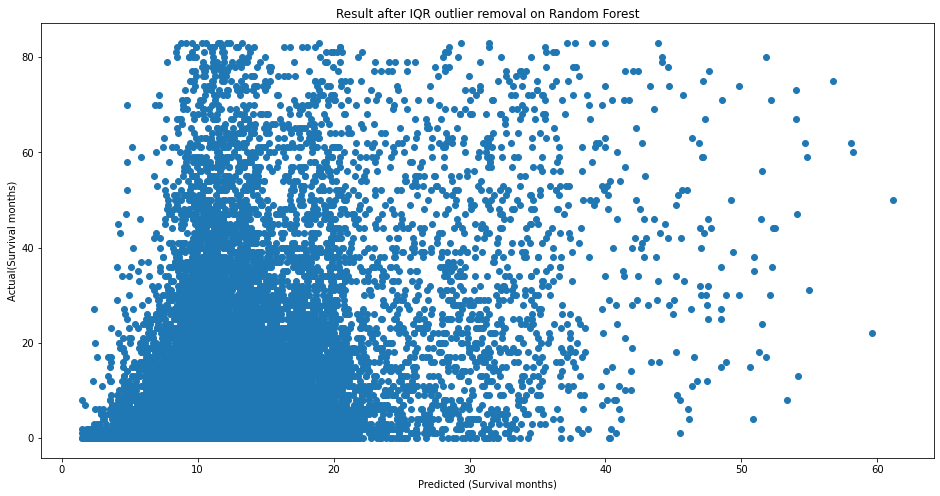

In [146]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(rf_last_iteration_predicted,rf_last_iteration_actual)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after IQR outlier removal on Random Forest")
plt.show()

## Gradient Boosting Regression

In [149]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
rmse_gbm = []
gb_last_iteration_actual=[]
gb_last_iteration_predicted=[]
for i in range(0, 10):
#     print(i)
    X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.3)
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_trainf, y_trainf)
    y_pred_gbm = reg.predict(X_testf)
    if(i==9):
        gb_last_iteration_actual=y_testf
        gb_last_iteration_predicted=y_pred_gbm
    rmse_gbm.append(sqrt(mean_squared_error(y_testf, y_pred_gbm)))
print("Standard Deviation of predicted values",statistics.stdev(gb_last_iteration_predicted))
gb_last_iteration_predicted_is = np.array(gb_last_iteration_predicted)
gb_last_iteration_actual_is = np.array(gb_last_iteration_actual)
n = len(gb_last_iteration_actual_is)
print("Standard Deviation Residuals",sqrt((sum((gb_last_iteration_predicted_is - gb_last_iteration_actual_is)**2))/(n-2)))

print("RMSE cross validation is ",statistics.mean(rmse_gbm))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(gb_last_iteration_actual, gb_last_iteration_predicted))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(gb_last_iteration_actual, gb_last_iteration_predicted))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(gb_last_iteration_actual, gb_last_iteration_predicted)))
sd.append(statistics.stdev(gb_last_iteration_predicted))
sdr.append(sqrt((sum((gb_last_iteration_predicted_is - gb_last_iteration_actual_is)**2))/(n-2)))
MAE.append(metrics.mean_absolute_error(gb_last_iteration_actual, gb_last_iteration_predicted))
MSE.append(metrics.mean_squared_error(gb_last_iteration_actual, gb_last_iteration_predicted))
RMSE_CV.append(statistics.mean(rmse_gbm))
RMSE.append(np.sqrt(metrics.mean_squared_error(gb_last_iteration_actual, gb_last_iteration_predicted)))

Standard Deviation of predicted values 5.855198192410603
Standard Deviation Residuals 14.641852858820553
RMSE cross validation is  14.747225754069522
MAE (Mean Absolute Error): 10.300802439288454
MSE (Mean Square Error ): 214.36480387701036
RMSE (Root Mean Square Error ): 14.641202268837432


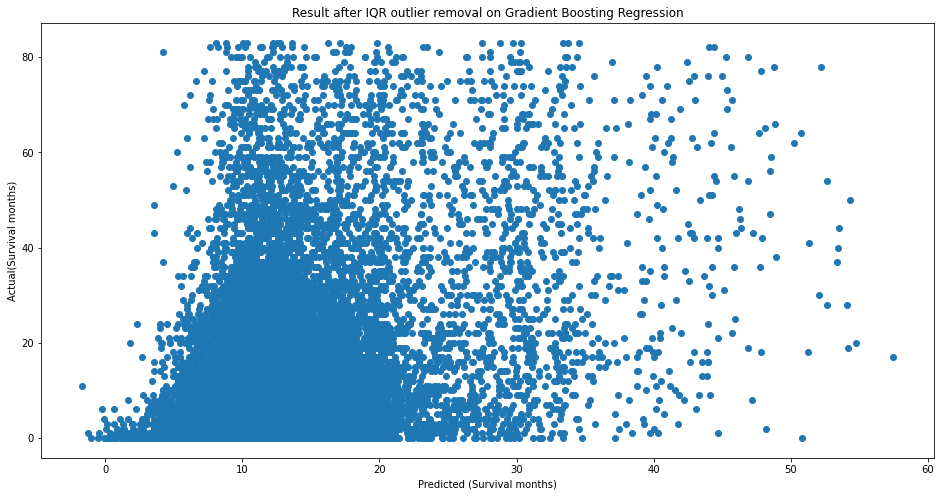

In [150]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(gb_last_iteration_predicted,gb_last_iteration_actual)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after IQR outlier removal on Gradient Boosting Regression")
plt.show()

## Ensemble

In [153]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from tqdm import tqdm
rmse_ensemble = []
rmse_ens_last_iteration_actual=[]
rmse_ens_last_iteration_predicted=[]
for i in tqdm(range(0, 10)):
    X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.3)
    r1 = LinearRegression()
    r2 = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200)
    r3 = GradientBoostingRegressor(random_state=0)
    er = VotingRegressor([('lr', r1), ('rf', r2), ('gb', r3)])
    y_pred_ensemble = er.fit(X_trainf, y_trainf).predict(X_testf)
    if(i==9):
        rmse_ens_last_iteration_actual=y_testf
        rmse_ens_last_iteration_predicted=y_pred_ensemble
    rmse_ensemble.append(sqrt(mean_squared_error(y_testf, y_pred_ensemble)))
print("Standard Deviation of predicted values",statistics.stdev(rmse_ens_last_iteration_predicted))
rmse_ens_last_iteration_predicted_is = np.array(rmse_ens_last_iteration_predicted)
rmse_ens_last_iteration_actual_is = np.array(rmse_ens_last_iteration_actual)
n = len(rmse_ens_last_iteration_actual_is)
print("Standard Deviation Residuals",sqrt((sum((rmse_ens_last_iteration_predicted_is - rmse_ens_last_iteration_actual_is)**2))/(n-2)))

print("RMSE cross validation is ",statistics.mean(rmse_ensemble))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(rmse_ens_last_iteration_actual, rmse_ens_last_iteration_predicted))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(rmse_ens_last_iteration_actual, rmse_ens_last_iteration_predicted))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(rmse_ens_last_iteration_actual, rmse_ens_last_iteration_predicted)))
sd.append(statistics.stdev(rmse_ens_last_iteration_predicted))
sdr.append(sqrt((sum((rmse_ens_last_iteration_predicted_is - rmse_ens_last_iteration_actual_is)**2))/(n-2)))
MAE.append(metrics.mean_absolute_error(rmse_ens_last_iteration_actual, rmse_ens_last_iteration_predicted))
MSE.append(metrics.mean_squared_error(rmse_ens_last_iteration_actual, rmse_ens_last_iteration_predicted))
RMSE_CV.append(statistics.mean(rmse_ensemble))
RMSE.append(np.sqrt(metrics.mean_squared_error(rmse_ens_last_iteration_actual, rmse_ens_last_iteration_predicted)))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:04<00:00, 18.47s/it]


Standard Deviation of predicted values 5.603181873344583
Standard Deviation Residuals 14.66236966099559
RMSE cross validation is  14.692911086060022
MAE (Mean Absolute Error): 10.349254099139769
MSE (Mean Square Error ): 214.96597938501716
RMSE (Root Mean Square Error ): 14.661718159377406


In [152]:
# sd

[5.371178051885274, 6.086402980614285, 5.855198192410603]

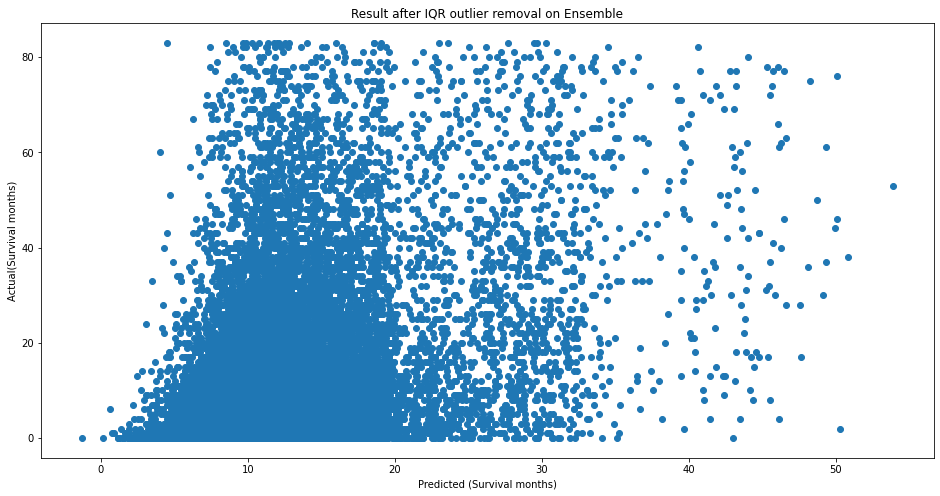

In [154]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(rmse_ens_last_iteration_predicted,rmse_ens_last_iteration_actual)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after IQR outlier removal on Ensemble")
plt.show()

## SVM

In [156]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
svm_res = []
# # svm_last_iteration_actual=[]
# svm_last_iteration_predicted=[]
# for i in tqdm(range(0, 10)):
X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.3)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_trainf, y_trainf)
y_pred_svr = regr.predict(X_testf)
#     if(i==9):
svm_last_iteration_actual=y_testf
svm_last_iteration_predicted=y_pred_svr
svm_res.append(sqrt(mean_squared_error(y_testf, y_pred_svr)))
print("Standard Deviation of predicted values",statistics.stdev(svm_last_iteration_predicted))
svm_last_iteration_predicted_is = np.array(svm_last_iteration_predicted)
svm_last_iteration_actual_is = np.array(svm_last_iteration_actual)
n = len(svm_last_iteration_actual_is)
print("Standard Deviation Residuals",sqrt((sum((svm_last_iteration_predicted_is - svm_last_iteration_actual_is)**2))/(n-2)))
print("RMSE cross validation is ",statistics.mean(svm_res))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(svm_last_iteration_actual, svm_last_iteration_predicted))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(svm_last_iteration_actual, svm_last_iteration_predicted))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(svm_last_iteration_actual, svm_last_iteration_predicted)))
sd.append(statistics.stdev(svm_last_iteration_predicted))
sdr.append(sqrt((sum((svm_last_iteration_predicted_is - svm_last_iteration_actual_is)**2))/(n-2)))
MAE.append(metrics.mean_absolute_error(svm_last_iteration_actual, svm_last_iteration_predicted))
MSE.append(metrics.mean_squared_error(svm_last_iteration_actual, svm_last_iteration_predicted))
RMSE_CV.append(statistics.mean(svm_res))
RMSE.append(np.sqrt(metrics.mean_squared_error(svm_last_iteration_actual, svm_last_iteration_predicted)))

Standard Deviation of predicted values 4.694388027564066
Standard Deviation Residuals 15.490977107045582
RMSE cross validation is  15.490288787429714
MAE (Mean Absolute Error): 9.634749765930701
MSE (Mean Square Error ): 239.94904671797073
RMSE (Root Mean Square Error ): 15.490288787429714


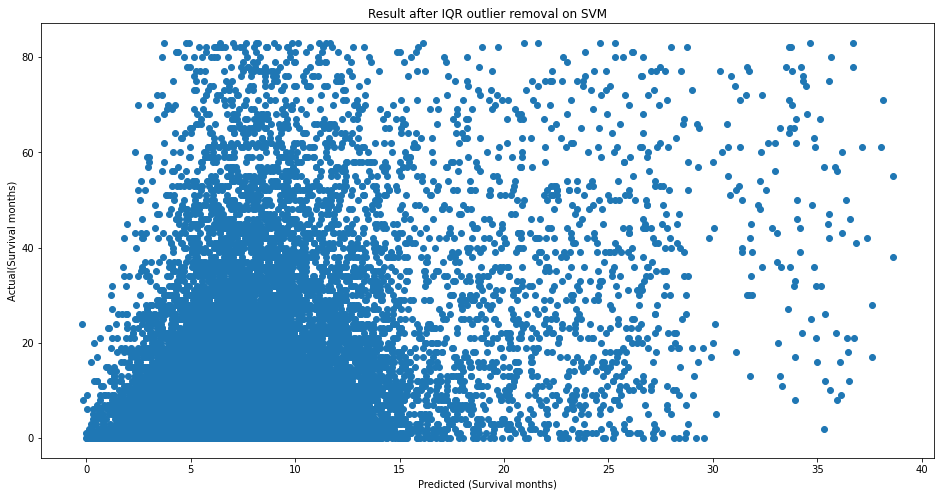

In [157]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(svm_last_iteration_predicted,svm_last_iteration_actual)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after IQR outlier removal on SVM")
plt.show()

In [ ]:
# print("Standard Deviation of predicted values",statistics.stdev(y_pred_ensemble))
# y_pred_ensemble = np.array(y_pred_ensemble)
# y_test = np.array(y_test)
# n = len(y_pred - y_test)
# print("Standard Deviation Residuals",sqrt((sum((y_pred - y_test)**2))/(n-2)))

## Decision Tree

In [160]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
rmse_dt = []
dt_last_iteration_actual=[]
dt_last_iteration_predicted=[]
for i in tqdm(range(0, 10)):
    X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size=0.3)
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_trainf, y_trainf)
    y_pred_dt = regressor.predict(X_testf)
    if(i==9):
        dt_last_iteration_actual=y_testf
        dt_last_iteration_predicted=y_pred_dt
    rmse_dt.append(sqrt(mean_squared_error(y_testf, y_pred_dt)))
print("Standard Deviation of predicted values",statistics.stdev(dt_last_iteration_predicted))
dt_last_iteration_predicted_is = np.array(dt_last_iteration_predicted)
dt_last_iteration_actual_is = np.array(dt_last_iteration_actual)
n = len(dt_last_iteration_actual_is)
print("Standard Deviation Residuals",sqrt((sum((dt_last_iteration_predicted_is - dt_last_iteration_actual_is)**2))/(n-2)))
print("RMSE cross validation is ",statistics.mean(rmse_dt))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(dt_last_iteration_actual, dt_last_iteration_predicted))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(dt_last_iteration_actual, dt_last_iteration_predicted))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(dt_last_iteration_actual, dt_last_iteration_predicted)))
sd.append(statistics.stdev(dt_last_iteration_predicted))
sdr.append(sqrt((sum((dt_last_iteration_predicted_is - dt_last_iteration_actual_is)**2))/(n-2)))
MAE.append(metrics.mean_absolute_error(dt_last_iteration_actual, dt_last_iteration_predicted))
MSE.append(metrics.mean_squared_error(dt_last_iteration_actual, dt_last_iteration_predicted))
RMSE_CV.append(statistics.mean(rmse_dt))
RMSE.append(np.sqrt(metrics.mean_squared_error(dt_last_iteration_actual, dt_last_iteration_predicted)))


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.52it/s]


Standard Deviation of predicted values 14.965710172256827
Standard Deviation Residuals 19.888878449970754
RMSE cross validation is  19.964136746737363
MAE (Mean Absolute Error): 13.477004928777788
MSE (Mean Square Error ): 395.53233381731724
RMSE (Root Mean Square Error ): 19.887994715840943


In [159]:
dt_last_iteration_predicted

[]

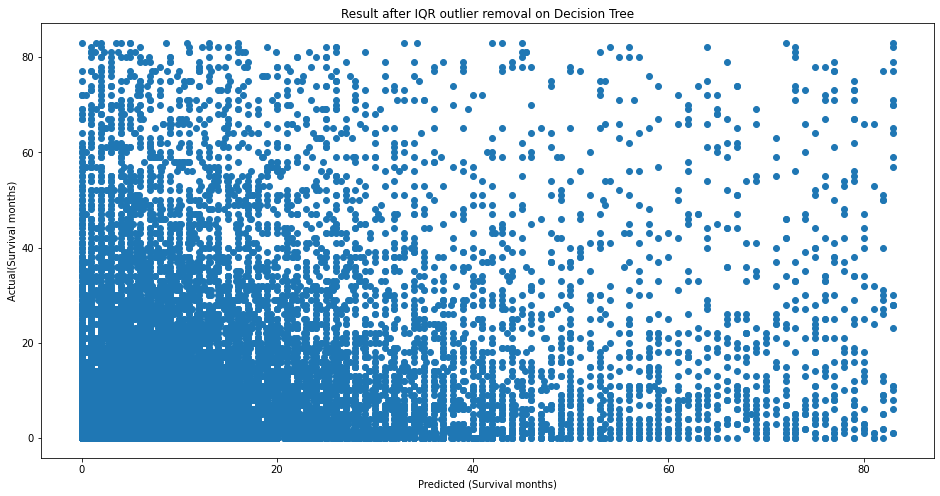

In [161]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dt_last_iteration_predicted,dt_last_iteration_actual)
ax.set_xlabel('Predicted (Survival months)')
ax.set_ylabel('Actual(Survival months)')
ax.set_title("Result after IQR outlier removal on Decision Tree")
plt.show()

In [162]:
print("order is",methods)
print("standard deviation",sd)
print("standard deviation residual",sdr)
print("RMSE cross validation",RMSE_CV)
print("Mean Absolute error",MAE)
print("Mean Squared Error",MSE)
print("Root Mean Squared error",RMSE)

order is ['LR', 'RF', 'GB', 'ENS', 'DT']
standard deviation [5.371178051885274, 6.086402980614285, 5.855198192410603, 5.603181873344583, 4.694388027564066, 14.965710172256827]
standard deviation residual [14.97876773612364, 14.649574480642304, 14.641852858820553, 14.66236966099559, 15.490977107045582, 19.888878449970754]
RMSE cross validation [14.956484850312737, 14.759297022694119, 14.747225754069522, 14.692911086060022, 15.490288787429714, 19.964136746737363]
Mean Absolute error [10.634822253713258, 10.316861326048409, 10.300802439288454, 10.349254099139769, 9.634749765930701, 13.477004928777788]
Mean Squared Error [224.34354478886337, 214.59096110225232, 214.36480387701036, 214.96597938501716, 239.94904671797073, 395.53233381731724]
Root Mean Squared error [14.978102175805297, 14.64892354755981, 14.641202268837432, 14.661718159377406, 15.490288787429714, 19.887994715840943]


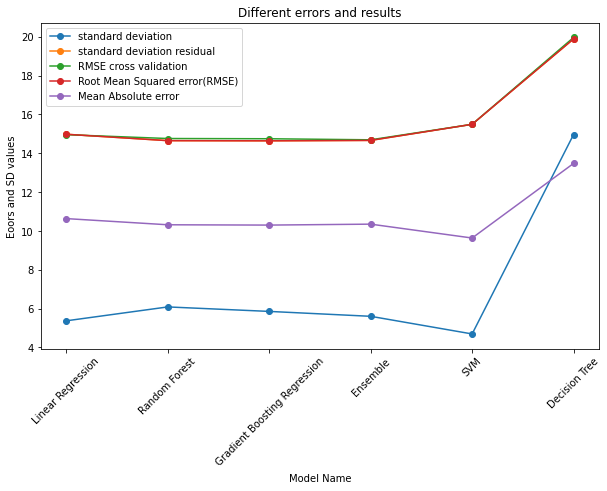

In [166]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(methods,sd, marker='o',label="standard deviation")
plt.plot(methods,sdr, marker='o',label="standard deviation residual")
plt.plot(methods,RMSE_CV, marker='o',label="RMSE cross validation")
plt.plot(methods,RMSE, marker='o',label="Root Mean Squared error(RMSE)")
plt.plot(methods,MAE, marker='o',label="Mean Absolute error")
plt.xlabel('Model Name')
plt.ylabel("Eoors and SD values")
plt.title('Different errors and results')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [8]:
import pandas as pd
index_list = ["Linear Regression", "Random Forest", "Gradient Boosting", "Ensemble", "SVM", "Decision Tree"]
analysis = pd.DataFrame()
analysis["Standard Deviation"] = [5.371178051885274, 6.086402980614285, 5.855198192410603, 5.603181873344583, 4.694388027564066, 14.965710172256827]
analysis["Standard Deviation of Residuals"] = [14.97876773612364, 14.649574480642304, 14.641852858820553, 14.66236966099559, 15.490977107045582, 19.888878449970754]
analysis["RMSE"] = [14.956484850312737, 14.759297022694119, 14.747225754069522, 14.692911086060022, 15.490288787429714, 19.964136746737363]
analysis["MAE"] = [10.634822253713258, 10.316861326048409, 10.300802439288454, 10.349254099139769, 9.634749765930701, 13.477004928777788]
analysis["MSE"] = [224.34354478886337, 214.59096110225232, 214.36480387701036, 214.96597938501716, 239.94904671797073, 395.53233381731724]
analysis["RMSE"] = [14.978102175805297, 14.64892354755981, 14.641202268837432, 14.661718159377406, 15.490288787429714, 19.887994715840943]
analysis["ML Algorithm"] = index_list
analysis.set_index("ML Algorithm", inplace = True)
analysis

,Standard Deviation,Standard Deviation of Residuals,RMSE,MAE,MSE
ML Algorithm,,,,,
Linear Regression,5.371178,14.978768,14.978102,10.634822,224.343545
Random Forest,6.086403,14.649574,14.648924,10.316861,214.590961
Gradient Boosting,5.855198,14.641853,14.641202,10.300802,214.364804
Ensemble,5.603182,14.662370,14.661718,10.349254,214.965979
SVM,4.694388,15.490977,15.490289,9.634750,239.949047
Decision Tree,14.965710,19.888878,19.887995,13.477005,395.532334
